# Exploratory Data Analysis (EDA)

In this notebook, we will perform exploratory data analysis on the Tunisian stock market data to gain insights and identify patterns.


In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from dash import Dash, html, dcc, Input, Output
from scipy import stats
import numpy as np

In [2]:
# Reading the data
data = pd.read_csv('./data/cleaned_weekly_stock_market.csv')

# Display the first few rows of the dataset
data.head()

,companyName,date,openingPrice,highestPrice,lowestPrice,closingPrice,volume
0,AMEN BANK,2014-06-16,23.63,23.63,22.75,23.14,1608.0
1,AMEN BANK,2014-06-23,23.14,23.14,22.37,22.75,16837.0
2,AMEN BANK,2014-06-30,22.75,22.97,22.07,22.66,33514.0
3,AMEN BANK,2014-07-07,22.75,23.17,21.88,22.74,3340.0
4,AMEN BANK,2014-07-14,22.84,23.16,22.58,22.75,5789.0


## Summary Statistics

We will start by generating summary statistics for the dataset to understand its basic properties.


In [3]:
# Summary statistics
summary_stats = data.describe()
summary_stats


,openingPrice,highestPrice,lowestPrice,closingPrice,volume
count,38629.000000,38629.000000,38629.000000,38629.000000,3.862900e+04
mean,106.776760,107.697649,105.851822,106.915255,2.820515e+05
std,792.840208,798.845088,786.942990,793.849486,2.509916e+06
min,0.100000,0.100000,0.090000,0.100000,0.000000e+00
25%,2.920000,2.990000,2.850000,2.930000,1.606000e+03
50%,6.687000,6.800000,6.520000,6.700000,1.002600e+04
75%,14.710000,14.930000,14.490000,14.730000,3.897600e+04
max,9683.320000,9811.400000,9683.320000,9774.580000,1.124223e+08


In [4]:
data.shape

(38629, 7)

## Companies Stock Prices

we will visualize the stock prices of the companies in the dataset to identify patterns and trends.

In [5]:
data["companyName"].unique()

array(['AMEN BANK', 'ADWYA', 'AETECH', 'AIR LIQUIDE TUNISIE',
       'SOCIETE CHIMIQUE ALKIMIA', 'AMI', 'AMS', 'MAGHREBIA VIE', 'ARTES',
       'ASSAD', 'ASSURANCES MAGHREBIA', 'ASTREE', 'ARAB TUNISIAN BANK',
       'ARAB TUNISIAN LEASE', 'BH BANK', 'BH ASSURANCE', 'BH LEASING',
       'BIAT', 'BEST LEASE', 'BANQUE NATIONALE AGRICOLE',
       'BANQUE DE TUNISIE', 'BTE (ADP)', 'CARTHAGE CEMENT', 'CELLCOM',
       'CIL', 'CITY CARS', 'CEREALIS', 'DELICE HOLDING', 'EURO-CYCLES',
       'ELBENE', 'GIF FILTER', 'HANNIBAL LEASE', 'ICF', "LAND'OR",
       'ELECTROSTAR', 'MAGASIN GENERAL', 'SOTUMAG', 'MIP', 'MONOPRIX',
       'MPBS', 'ENNAKL AUTOMOBILES', 'NEW BODY LINE', 'ONE TECH',
       'POULINA GROUP HOLDING', 'OFFICE PLAST',
       'PLACEMENTS DE TUNISIE - SICAF', 'TUNINDEX', 'SAH',
       'MEUBLES INTERIEURS', 'CIMENTS DE BIZERTE', 'SERVICOM', 'SFBT',
       'SIAME', 'SIMPAR', 'SIPHAT', 'SITS', 'SMART TUNISIE', 'SANIMED',
       'ESSOUKNA', 'SOMOCER', 'SOPAT', 'SOTEMAIL', 'SOTETEL', 'SO

In [6]:
data['date'] = pd.to_datetime(data['date'])

data_on_specific_date = data[data['date'] == '2024-06-10']

companies_with_data_on_specific_date = data_on_specific_date['companyName'].unique()

filtered_data = data[data['companyName'].isin(companies_with_data_on_specific_date)]

print(filtered_data)
print(filtered_data['companyName'].unique())

      companyName       date  openingPrice  highestPrice  lowestPrice  \
0       AMEN BANK 2014-06-16         23.63         23.63        22.75   
1       AMEN BANK 2014-06-23         23.14         23.14        22.37   
2       AMEN BANK 2014-06-30         22.75         22.97        22.07   
3       AMEN BANK 2014-07-07         22.75         23.17        21.88   
4       AMEN BANK 2014-07-14         22.84         23.16        22.58   
...           ...        ...           ...           ...          ...   
37410         UIB 2024-05-13         23.50         24.40        23.05   
37411         UIB 2024-05-20         24.10         24.12        23.90   
37412         UIB 2024-05-27         23.97         23.97        23.10   
37413         UIB 2024-06-03         23.23         23.70        23.23   
37414         UIB 2024-06-10         23.60         23.70        23.26   

       closingPrice   volume  
0             23.14   1608.0  
1             22.75  16837.0  
2             22.66  33514.0  

## Companies Stock Prices

In [13]:
# Ensure all required columns are present
required_columns = ['date', 'companyName', 'openingPrice', 'highestPrice', 'lowestPrice', 'closingPrice', 'volume']
if not all(column in data.columns for column in required_columns):
    missing = [column for column in required_columns if column not in data.columns]
    raise ValueError(f"The DataFrame is missing the required columns: {missing}")

data['date'] = pd.to_datetime(data['date'])

filtered_data = data.copy()

# Create a list of unique company names from 'filtered_data'
companies = filtered_data['companyName'].unique()

# Initialize Dash app
app = Dash(__name__)

# App layout and callback definitions follow...

app.layout = html.Div([
    dcc.Dropdown(
        id='company-dropdown',
        options=[{'label': company, 'value': company} for company in companies],
        value=companies[0],  # default value
        style={'width': '50%'}
    ),
    dcc.Graph(id='stock-graph')
])

@app.callback(
    Output('stock-graph', 'figure'),
    Input('company-dropdown', 'value')
)
def update_graph(selected_company):
    # Filter data for the selected company
    company_data = filtered_data[filtered_data['companyName'] == selected_company]
    
    fig = go.Figure()
    
    # Add traces for price data
    fig.add_trace(go.Scatter(
        x=company_data['date'],
        y=company_data['openingPrice'],
        mode='lines',
        name='Opening Price',
        hovertemplate='%{x|%Y-%m-%d} - %{y:.2f}<extra></extra>',
    ))

    fig.add_trace(go.Scatter(
        x=company_data['date'],
        y=company_data['highestPrice'],
        mode='lines',
        name='Highest Price',
        hovertemplate='%{x|%Y-%m-%d} - %{y:.2f}<extra></extra>',
    ))

    fig.add_trace(go.Scatter(
        x=company_data['date'],
        y=company_data['lowestPrice'],
        mode='lines',
        name='Lowest Price',
        hovertemplate='%{x|%Y-%m-%d} - %{y:.2f}<extra></extra>',
    ))

    fig.add_trace(go.Scatter(
        x=company_data['date'],
        y=company_data['closingPrice'],
        mode='lines',
        name='Closing Price',
        hovertemplate='%{x|%Y-%m-%d} - %{y:.2f}<extra></extra>',
    ))

    # Add a bar chart for volume
    fig.add_trace(go.Bar(
        x=company_data['date'],
        y=company_data['volume'],
        name='Volume',
        marker_color='rgba(100, 200, 102, 0.5)',
        hovertemplate='%{x|%Y-%m-%d} - %{y}<extra></extra>',
    ))

    fig.update_layout(
        height=600,
        title=f'Stock Market Data of {selected_company}',
        xaxis_title='Date',
        yaxis_title='Price',
        hovermode='x unified',
        template='plotly_white',
        showlegend=True,
        legend=dict(
        font=dict(
            size=10,  
        ),
        orientation="h",
    ),
    )

    # Create a second y-axis for the volume
    fig.update_layout(
        yaxis=dict(
            title='Price',
            tickformat=".2f",
        ),
        yaxis2=dict(
            title='Volume',
            overlaying='y',
            side='right',
            showgrid=False,
        )
    )

    # Assign the volume trace to the second y-axis
    fig.data[-1].update(yaxis='y2')

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

## Correlation Heatmap of Closing Prices Between Companies

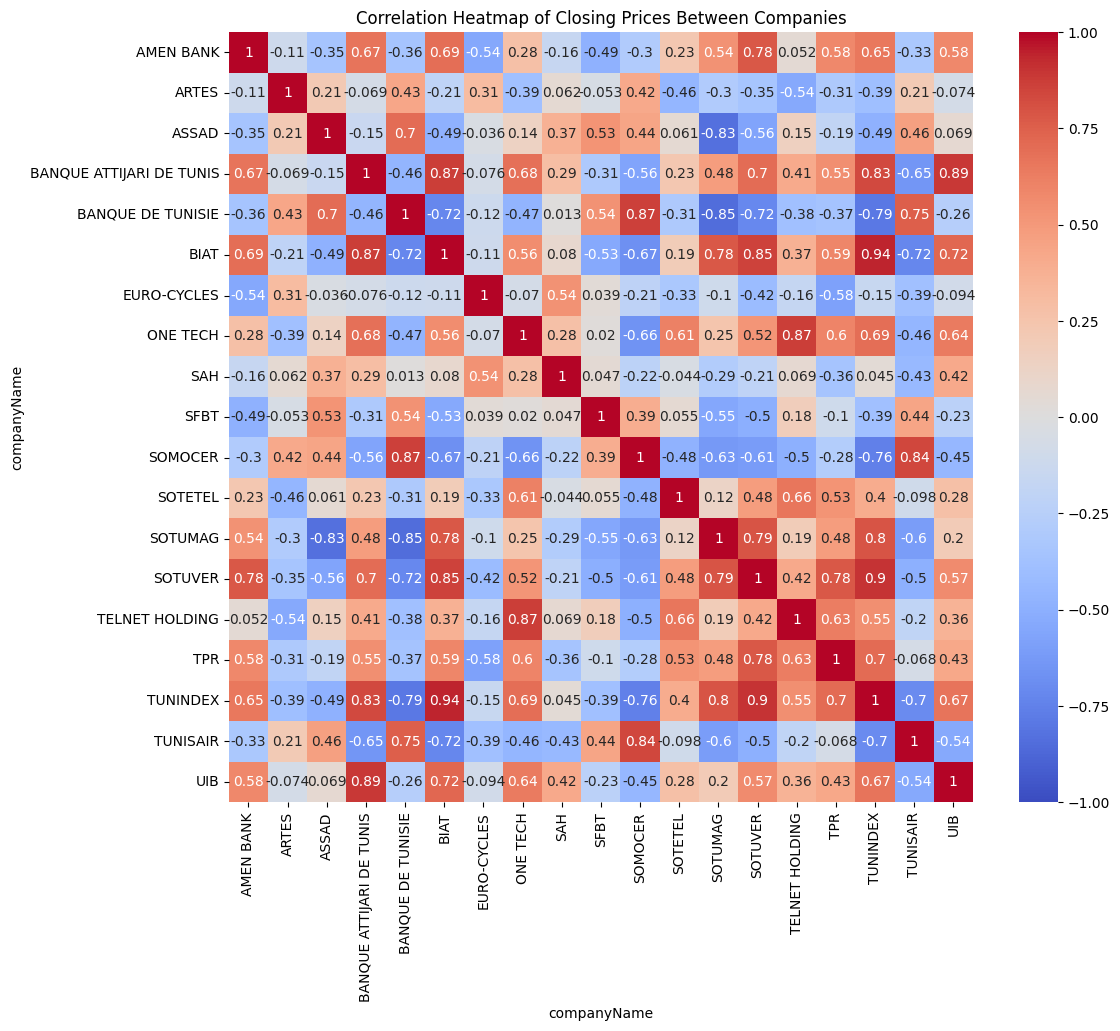

In [8]:
# Define the required columns
required_columns = ['date', 'companyName', 'closingPrice']
filtered_data = filtered_data[required_columns]

# Pivot the data to organize by date and company names
pivot_data = filtered_data.pivot(index='date', columns='companyName', values='closingPrice')

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Closing Prices Between Companies')
plt.show()

## Stock weekly moving average

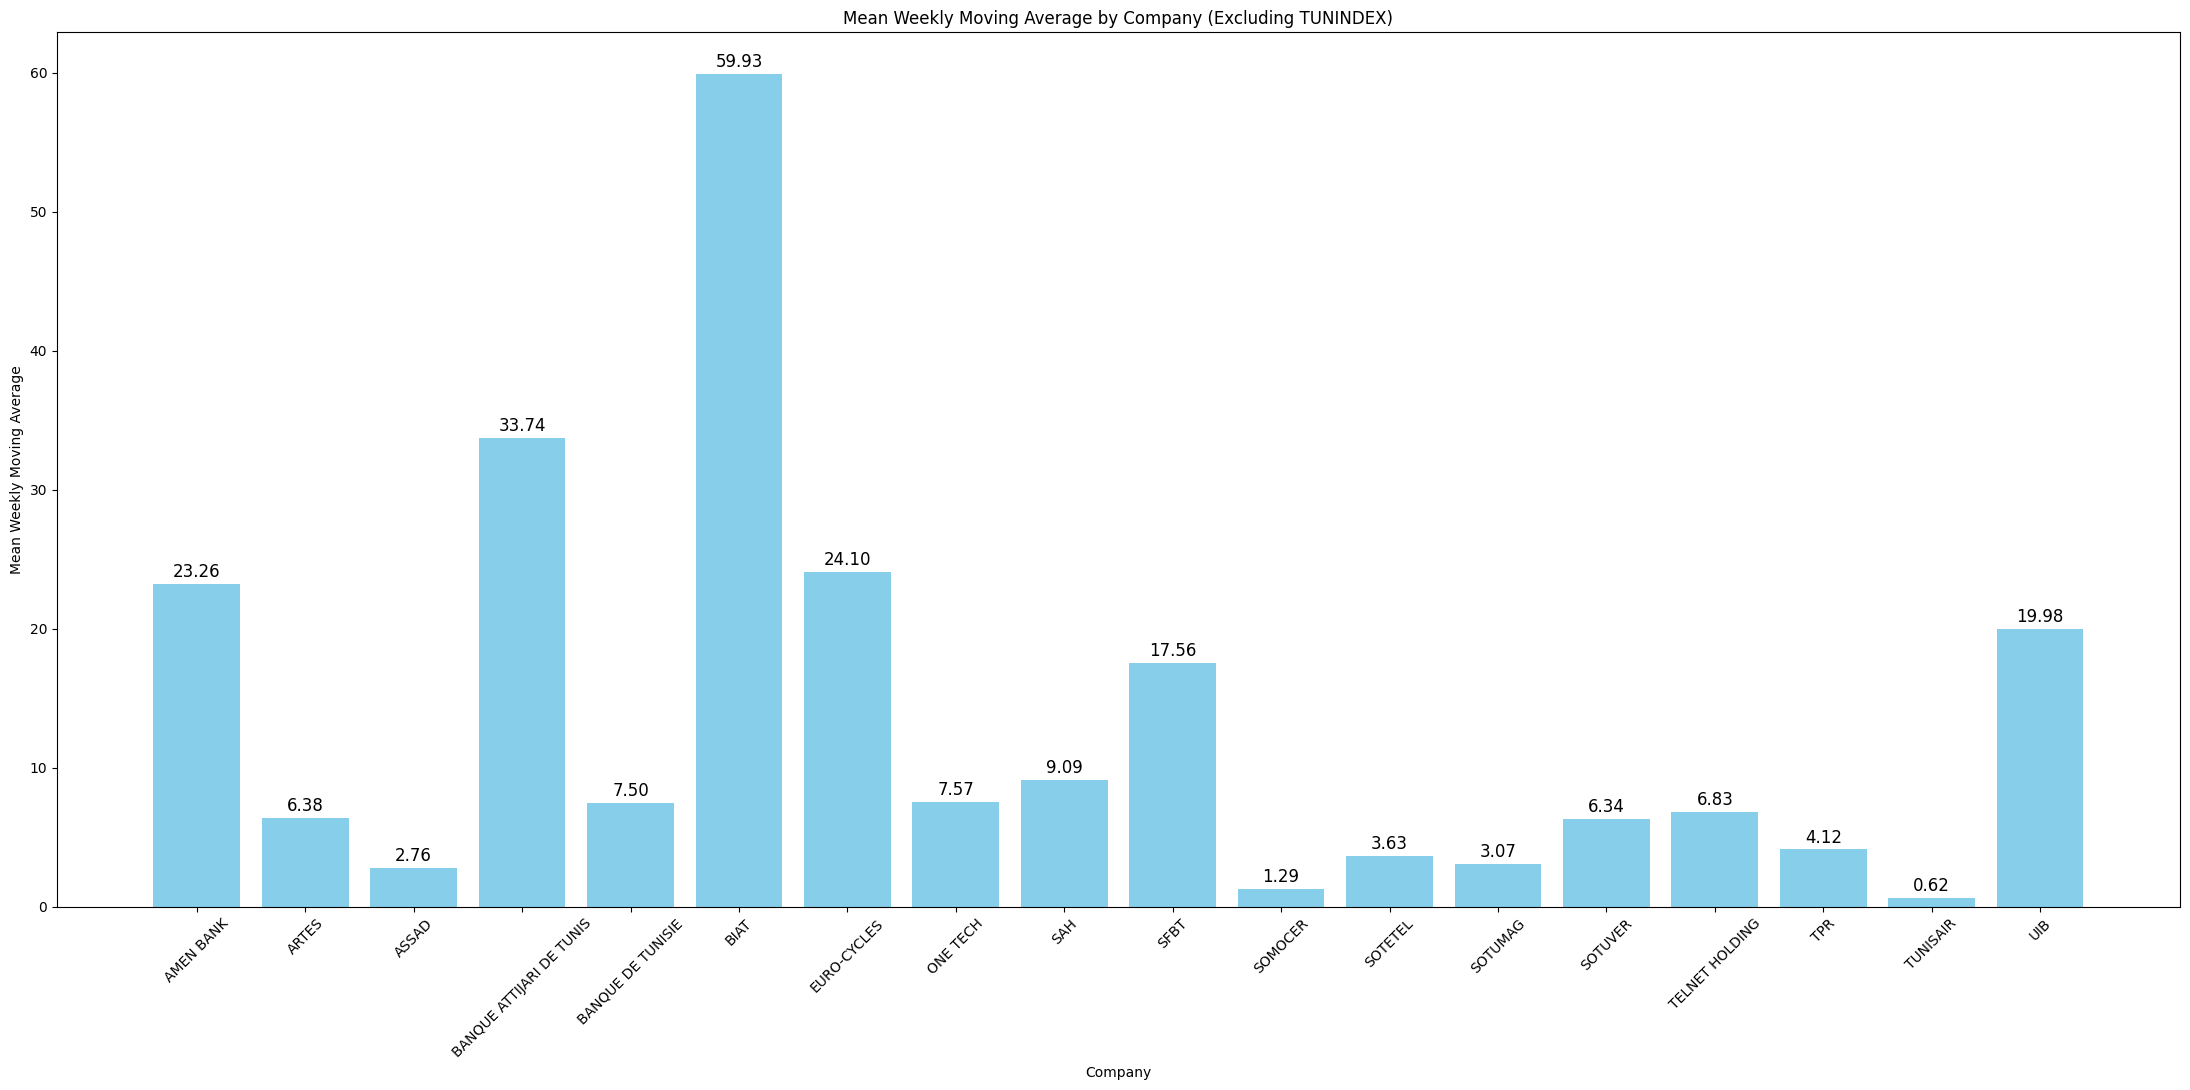

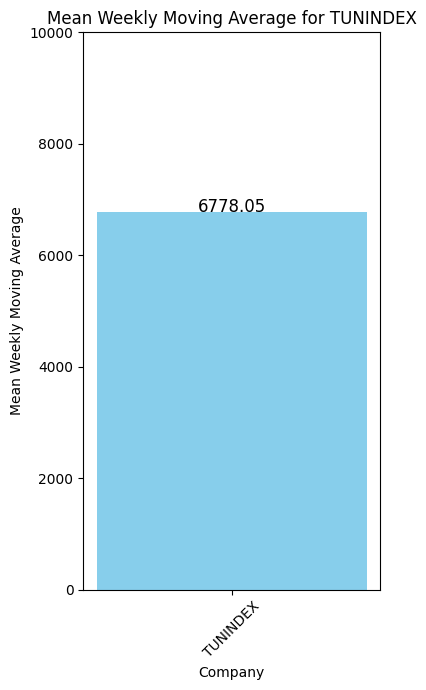

In [9]:
# Define the required columns
required_columns = ['date', 'companyName', 'closingPrice']
filtered_data = filtered_data[required_columns]

# Set the date column as the index
filtered_data.set_index('date', inplace=True)

# Group by companyName and resample each group on a weekly basis, calculating the mean closing price
weekly_data = filtered_data.groupby('companyName').resample('W').mean().reset_index()

# Calculate the weekly moving average for each company
weekly_data['weekly_moving_avg'] = weekly_data.groupby('companyName')['closingPrice'].transform(lambda x: x.rolling(window=4).mean())

# Remove rows with NaN values in 'weekly_moving_avg' column
weekly_data = weekly_data.dropna(subset=['weekly_moving_avg'])

# Reset index to move 'date' back to a column
filtered_data.reset_index(inplace=True)

# Select the relevant columns
output_data = weekly_data[['date', 'companyName', 'weekly_moving_avg']]


# Compute the mean of the weekly moving averages for each company
mean_weekly_moving_avg = weekly_data.groupby('companyName')['weekly_moving_avg'].mean().reset_index()
mean_weekly_moving_avg.columns = ['companyName', 'mean_weekly_moving_avg']


# Split data into two parts: excluding TUNINDEX and including only TUNINDEX
mean_weekly_moving_avg_excluding_tunindex = mean_weekly_moving_avg[mean_weekly_moving_avg['companyName'] != 'TUNINDEX']
mean_weekly_moving_avg_only_tunindex = mean_weekly_moving_avg[mean_weekly_moving_avg['companyName'] == 'TUNINDEX']

# Plotting first bar chart (excluding TUNINDEX) with annotations
plt.figure(figsize=(22, 11))

# Loop through each bar and annotate with value
for i, (company, mean_avg) in enumerate(zip(mean_weekly_moving_avg_excluding_tunindex['companyName'], mean_weekly_moving_avg_excluding_tunindex['mean_weekly_moving_avg'])):
    plt.bar(company, mean_avg, color='skyblue')
    plt.text(i, mean_avg + 0.5, f'{mean_avg:.2f}', ha='center', fontsize=12)

plt.title('Mean Weekly Moving Average by Company (Excluding TUNINDEX)')
plt.xlabel('Company')
plt.ylabel('Mean Weekly Moving Average')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting second bar chart (TUNINDEX only) with annotations
plt.figure(figsize=(4, 7))

# Loop through each bar and annotate with value
for i, (company, mean_avg) in enumerate(zip(mean_weekly_moving_avg_only_tunindex['companyName'], mean_weekly_moving_avg_only_tunindex['mean_weekly_moving_avg'])):
    plt.bar(company, mean_avg, color='skyblue')
    plt.text(i, mean_avg + 0.5, f'{mean_avg:.2f}', ha='center', fontsize=12)

plt.title('Mean Weekly Moving Average for TUNINDEX')
plt.xlabel('Company')
plt.ylabel('Mean Weekly Moving Average')
plt.xticks(rotation=45)
plt.ylim(0,10000)
plt.tight_layout()
plt.show()


## Calculating the Z-score for the closing price 

C:\Users\Kahla\AppData\Local\Temp\ipykernel_5920\2633338520.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



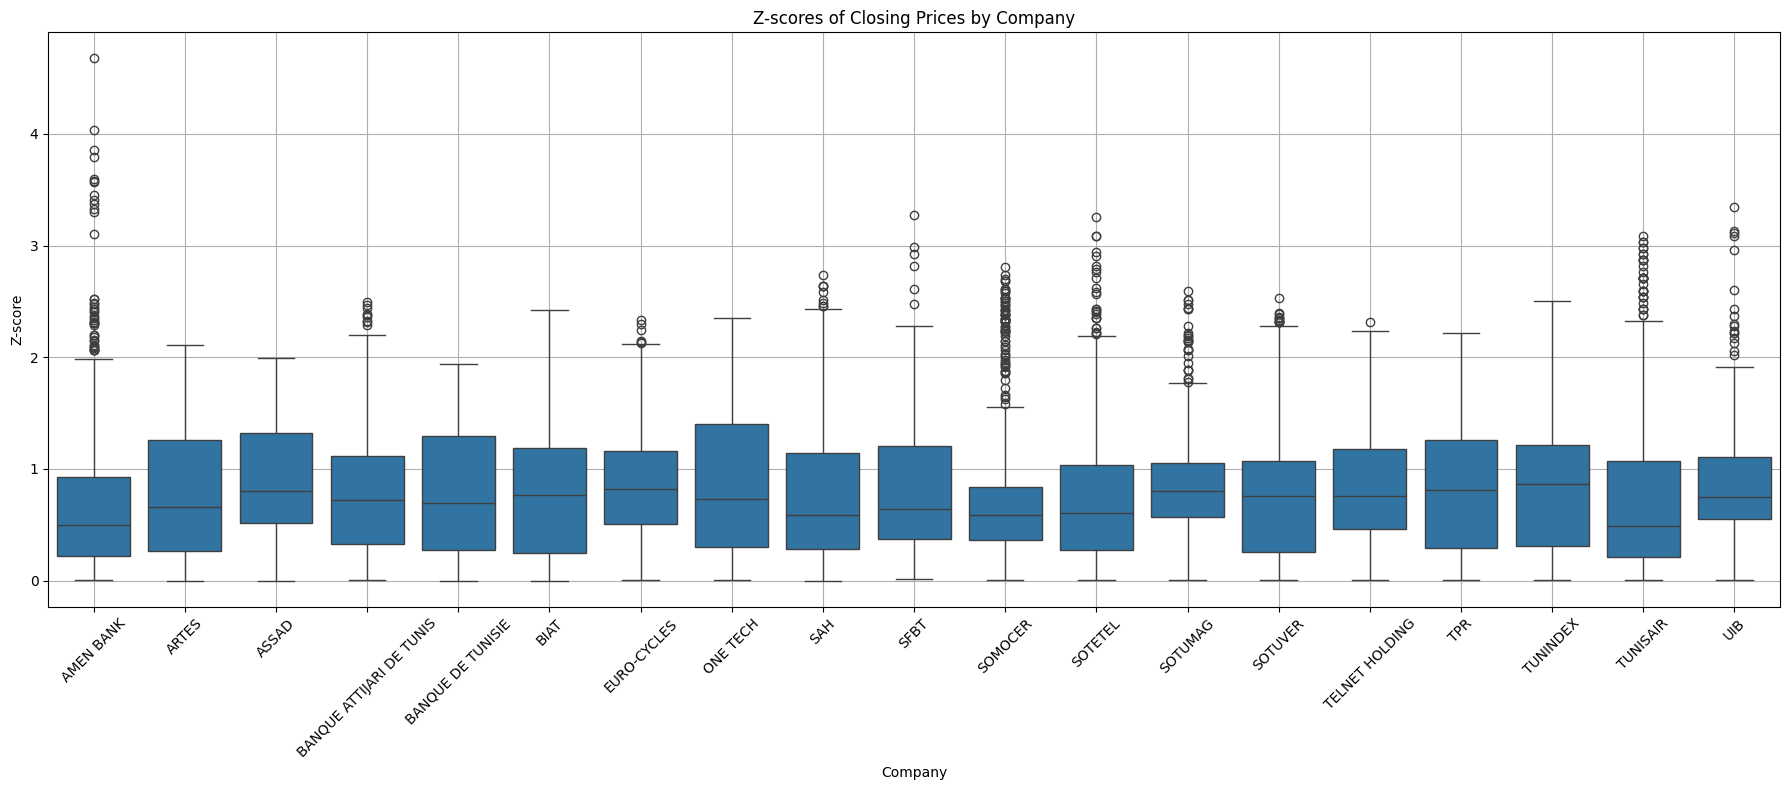

In [10]:
# Define the required columns
required_columns = ['date', 'companyName', 'closingPrice']
filtered_data = filtered_data[required_columns]

# Function to calculate Z-score for each company
def calculate_zscore(df):
    df['Zscore'] = np.abs(stats.zscore(df['closingPrice']))
    return df

# Apply the Z-score calculation for each company
output_data = filtered_data.groupby('companyName').apply(calculate_zscore).reset_index(drop=True)

# Select the relevant columns for output
output_data = output_data[['companyName', 'closingPrice', 'Zscore']]

# Plotting
plt.figure(figsize=(18, 8))
sns.boxplot(x='companyName', y='Zscore', data=output_data)
plt.title('Z-scores of Closing Prices by Company')
plt.xlabel('Company')
plt.ylabel('Z-score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# Counting outliers
outlier_threshold = 3  # Define the threshold for outliers (absolute Z-score > 3)

outlier_counts = output_data.groupby('companyName')['Zscore'].apply(lambda x: (x > outlier_threshold).sum()).reset_index()
outlier_counts.columns = ['companyName', 'OutlierCount']

print("Outlier Counts:")
print(outlier_counts)

Outlier Counts:
                 companyName  OutlierCount
0                  AMEN BANK            13
1                      ARTES             0
2                      ASSAD             0
3   BANQUE ATTIJARI DE TUNIS             0
4          BANQUE DE TUNISIE             0
5                       BIAT             0
6                EURO-CYCLES             0
7                   ONE TECH             0
8                        SAH             0
9                       SFBT             1
10                   SOMOCER             0
11                   SOTETEL             3
12                   SOTUMAG             0
13                   SOTUVER             0
14            TELNET HOLDING             0
15                       TPR             0
16                  TUNINDEX             0
17                  TUNISAIR             3
18                       UIB             4
